In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('C:\Downloads\Python-Data Science\Lab_Lecture\Titanic-Dataset.csv')

In [3]:
miss=df.isnull()

In [4]:
not_miss=df.notnull()

In [5]:
print("is null result")
print(miss.head())

is null result
   PassengerId  Survived  Pclass   Name  Gender    Age  SibSp  Parch  Ticket  \
0        False     False   False  False   False  False  False  False   False   
1        False     False   False  False   False  False  False  False   False   
2        False     False   False  False   False  False  False  False   False   
3        False     False   False  False   False  False  False  False   False   
4        False     False   False  False   False  False  False  False   False   

    Fare  Cabin  Embarked  
0  False   True     False  
1  False  False     False  
2  False   True     False  
3  False  False     False  
4  False   True     False  


In [6]:
print("is  not null result")
print(not_miss.head())

is  not null result
   PassengerId  Survived  Pclass  Name  Gender   Age  SibSp  Parch  Ticket  \
0         True      True    True  True    True  True   True   True    True   
1         True      True    True  True    True  True   True   True    True   
2         True      True    True  True    True  True   True   True    True   
3         True      True    True  True    True  True   True   True    True   
4         True      True    True  True    True  True   True   True    True   

   Fare  Cabin  Embarked  
0  True  False      True  
1  True   True      True  
2  True  False      True  
3  True   True      True  
4  True  False      True  


In [7]:
miss_counts=df.isnull().sum()
print("print missing values")
print(miss_counts)

print missing values
PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
df = pd.read_csv('C:\Downloads\Python-Data Science\Lab_Lecture\Titanic-Dataset.csv')

miss_age=df[df['Age'].isnull()]
print(miss_age)

miss_cabin=df[df['Cabin'].isnull()]
print(miss_cabin)

miss_embarked=df[df['Embarked'].isnull()]
print(miss_embarked)



     PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

     Gender  Age  SibSp  Parch      Tic

In [ ]:
original_shape=df.shape
df_any=df.dropna()
df_all=df.dropna(how='all')
df_subset=df.dropna(subset=['Age','Embarked'])


print(f"Original Shape: {original_shape}")
print(f"Shape after removing rows with ANY missing values: {df_any.shape}")
print(f"Shape after removing rows where ALL values are missing: {df_all.shape}")
print(f"Shape after removing rows where 'Age' or 'Embarked' are missing: {df_subset.shape}")

Original Shape: (891, 12)
Shape after removing rows with ANY missing values: (183, 12)
Shape after removing rows where ALL values are missing: (891, 12)
Shape after removing rows where 'Age' or 'Embarked' are missing: (712, 12)


In [10]:
df['Cabin']=df['Cabin'].fillna("unknown")
df['Age_zero'] = df['Age'].fillna(0)

In [11]:
import numpy as np 
df['Age_mean'] = df['Age'].fillna(df['Age'].mean())

df['Age_Median'] = df['Age'].fillna(np.nanmedian(df['Age']))

df['Embarked_Ffill'] = df['Embarked'].fillna(method='ffill')
df['Embarked_Bfill'] = df['Embarked'].fillna(method='bfill')


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12696\2778432682.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Embarked_Ffill'] = df['Embarked'].fillna(method='ffill')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12696\2778432682.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Embarked_Bfill'] = df['Embarked'].fillna(method='bfill')


In [12]:

import pandas as pd
import numpy as np
df = pd.read_csv('C:/Users/sbbha/OneDrive/Desktop/4th/py-ds_lab/Jupyter/Titanic-Dataset.csv')
mapping = {
    'yes':'yes','y': 'yes',1:'yes',
    'no':'no','n':'no',0:'no'
}

df['Survived_Status'] = df['Survived'].replace(mapping)
df.loc[0,'Age'] = -10
df.loc[(df['Age']<0) | (df['Age']>100), 'Age'] = np.nan
clean_median = np.nanmedian(df['Age'])
df['Age'] = df['Age'].fillna(clean_median)
print(df['Survived_Status'].head())
print(f"\n out-of-range values: {clean_median}")
print(f"Age at index 0: {df.loc[0, 'Age']}")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/sbbha/OneDrive/Desktop/4th/py-ds_lab/Jupyter/Titanic-Dataset.csv'

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('C:\Downloads\Python-Data Science\Lab_Lecture\Titanic-Dataset.csv')

grouped=df.groupby(['Gender','Pclass'])
summary_table=grouped.agg({
    'Age':['mean','min','max',np.std],
    'Fare':['mean','count'],
    'Survived':'mean'
})

summary_table.columns = ['Age_Mean', 'Age_Min', 'Age_Max', 'Age_Std', 
                         'Fare_Mean', 'Passenger_Count', 'Survival_Rate']
print(summary_table)

                Age_Mean  Age_Min  Age_Max    Age_Std   Fare_Mean  \
Gender Pclass                                                       
female 1       34.611765     2.00     63.0  13.612052  106.125798   
       2       28.722973     2.00     57.0  12.872702   21.970121   
       3       21.750000     0.75     63.0  12.729964   16.118810   
male   1       41.281386     0.92     80.0  15.139570   67.226127   
       2       30.740707     0.67     70.0  14.793894   19.741782   
       3       26.507589     0.42     74.0  12.159514   12.661633   

               Passenger_Count  Survival_Rate  
Gender Pclass                                  
female 1                    94       0.968085  
       2                    76       0.921053  
       3                   144       0.500000  
male   1                   122       0.368852  
       2                   108       0.157407  
       3                   347       0.135447  


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12696\2683108534.py:7: FutureWarning: The provided callable <function std at 0x000001CAB50CF420> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  summary_table=grouped.agg({


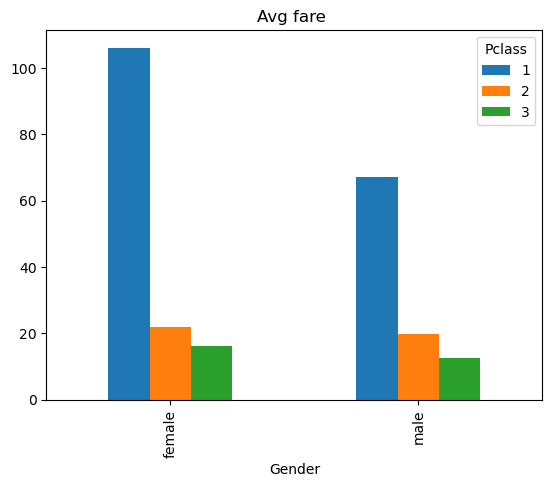

In [15]:
df.groupby(['Gender','Pclass'])['Fare'].mean().unstack().plot(kind='bar')
plt.title('Avg fare ')
plt.savefig('fare_analysis.png')

In [16]:
df.to_csv('cleaned_titanic.csv',index=False)
print("cleaned data:\n", df.isnull().sum())
print("\nUnique labels", df['Survived'].unique())

cleaned data:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Unique labels [0 1]


In [17]:
import pandas as pd
import numpy as np

df = pd.read_csv("C:\Downloads\Python-Data Science\Lab_Lecture\Titanic-Dataset.csv")


In [18]:
print("Missing_values \n")
print(df.isnull().sum())


Missing_values 

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [19]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("\nNumeric columns:", numeric_cols)



Numeric columns: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [20]:
for col in numeric_cols:
    mean_value = np.nanmean(df[col])
    df[col] = df[col].fillna(mean_value)


In [21]:
print("\n after cleaning:\n")
print(df.isnull().sum())



 after cleaning:

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [22]:
import pandas as pd
import numpy as np

data = {
    'Name': ['Amit', 'Neha', 'Rahul', 'Pooja'],
    'Age': [22, np.nan, 24, np.nan],
    'Gender': ['M', 'Female', 'male', 'F'],
    'Marks': [85, 90, np.nan, 88]
}

df = pd.DataFrame(data)

print("Before Cleaning:\n")
print(df)


Before Cleaning:

    Name   Age  Gender  Marks
0   Amit  22.0       M   85.0
1   Neha   NaN  Female   90.0
2  Rahul  24.0    male    NaN
3  Pooja   NaN       F   88.0


In [23]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Marks'] = df['Marks'].fillna(df['Marks'].mean())


In [24]:
df['Gender'] = df['Gender'].replace({
    'M': 'Male',
    'male': 'Male',
    'F': 'Female'
})


In [25]:
print("\nAfter Cleaning:\n")
print(df)



After Cleaning:

    Name   Age  Gender      Marks
0   Amit  22.0    Male  85.000000
1   Neha  23.0  Female  90.000000
2  Rahul  24.0    Male  87.666667
3  Pooja  23.0  Female  88.000000


In [28]:
import pandas as pd
df = pd.read_csv('C:\Downloads\Python-Data Science\Lab_Lecture\Titanic-Dataset.csv')

grouped = df.groupby('Gender').agg({
    'Age': ['mean', 'max', 'count'],
    'Fare': ['mean', 'max']
})

print(grouped)


              Age                   Fare          
             mean   max count       mean       max
Gender                                            
female  27.915709  63.0   261  44.479818  512.3292
male    30.726645  80.0   453  25.523893  512.3292
